# Project: Cardiovascular Disease: Causes, Treatment, and Prevention

In this project, I will investigate one of the the major causes of death in the world: cardiovascular disease!

In [2]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import d8error

## Part 1: Causes of Death 

In order to get a better idea of how I can most effectively prevent deaths, I need to first figure out what the major causes of death are. Run the following cell to read in and view the causes_of_death table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).
If you're interested, here is the original dataset! The age adjusted rate is the number of deaths per 100,000 population.

In [3]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

If I look at unadjusted data, the age distributions of each sample will influence death rates. In an older population, I would expect death rates to be higher for all causes since old age is associated with higher risk of death. To compare death rates without worrying about differences in the demographics of our populations, I adjust the data for age.

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. 

You aren't responsible for knowing how to do this adjustment, but should understand why I adjust for age and what the consequences of working with unadjusted data would be.

These are all the different causes of death in this dataset. I assign `unique_causes` to an array of all the unique causes of death. 



In [4]:
unique_causes = np.unique(causes_of_death.column("Cause"))
sorted(unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

I would like to plot the death rate for each disease over time. To do so, I must create a table with one column for each cause and one row for each year.
I created a table called causes_for_plotting. It should have one column called Year, and then a column with age-adjusted death rates for each of the causes I found earloer. There should be as many of these columns in causes_for_plotting as there are causes in `unique_causes`.

In [5]:
def first(x):
    return x.item(0)

causes_for_plotting = causes_of_death.pivot("Cause", "Year" , "Age Adjusted Death Rate" , first)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


Let's take a look at how age-adjusted death rates have changed across different causes over time. Run the cell below to compare Heart Disease (a chronic disease) and Influenza and Pneumonia (infectious diseases).

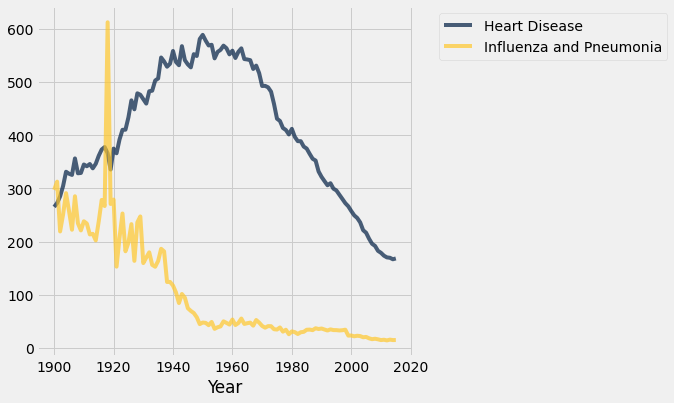

In [6]:
causes_for_plotting.select('Year', "Heart Disease", "Influenza and Pneumonia").plot('Year')

Beginning in 1900 and continuing until 1950, we observe that death rates for Influenza and Pneumonia decrease while death rates for Heart Disease increase. This phenomenon is known as the epidemiological transition: in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.

Run the cell below to see what a plot of the data would have looked like had you been living in 1950. CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.

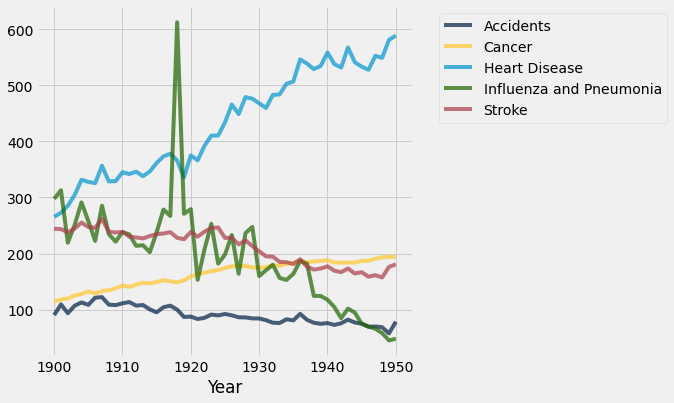

In [7]:

causes_for_plotting.where('Year', are.below_or_equal_to(1950)).plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of most other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers from  Framingham, Massachusetts for several decades, and followup studies even looked at their descendants. In this part of the project, we'll investigate some of the study's key findings about cholesterol and heart disease.

Run the cell below to examine data for 3,842 subjects from the first wave of the study, collected in 1956.

In [8]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells me whether the subject developed some form of heart disease at any point after the start of the study; a value of 1 indicates that they **did** develop heart disease and a value of 0 indicates that they **did not** develop heart disease.

I noticed that the table contains fewer rows than subjects in the original study -- I am excluding subjects who already had heart disease or had missing data.

### Part 2, Section 1: Diabetes and the Population

Before I begin my investigation of cholesterol, I'll first look at some limitations of this dataset. In particular, I will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the **prevalence of diagnosed diabetes (i.e., the proportion of the population who have it) in the U.S. around this time was 0.0093.** I am going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is *equivalent* to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is *different* from the prevalence of diagnosed diabetes within the population.

I am going to use the absolute distance between the **observed prevalence** in the study and the **true population prevalence** as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

I assigned `observed_diabetes_distance` to the observed value of the test statistic in the data from the Framingham Study 

I also took in mind that I need to perform my calculations based on the 3,842 subjects in the `framingham` table, not the 5,000 original study participants. Also, that prevalence is defined as the proportion of the population who have a disease.

In [9]:
true_population_prevalence = np.sum(framingham.group("DIABETES")[1][1])/len(framingham.column("DIABETES"))
observed_diabetes_distance = np.abs(true_population_prevalence - 0.0093)
observed_diabetes_distance

0.018029515877147319

I defined the function `diabetes_test_statistic` which should return exactly one simulated statistic of the absolute distance between the observed prevalence and the true population prevalence under the null hypothesis. I made sure that my simulated sample is the same size as my original sample.

I also created an array `diabetes_proportions` contains the proportions of the population without and with diabetes, respectively.

In [11]:
diabetes_proportions = make_array(.9907, .0093)
def diabetes_test_statistic():
    one_sample_proportion = sample_proportions(5000, diabetes_proportions)
    return np.abs(one_sample_proportion.item(1) - diabetes_proportions.item(1))
diabetes_test_statistic()

0.00090000000000000149

I completed the following code to simulate 5,000 values of the statistic under the null hypothesis.

In [12]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    new_simulation = diabetes_test_statistic()
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, new_simulation)
    
diabetes_simulated_stats

array([ 0.0001,  0.0015,  0.0005, ...,  0.0015,  0.0009,  0.0003])

I ran the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

/Users/elle/Library/Python/3.8/lib/python/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


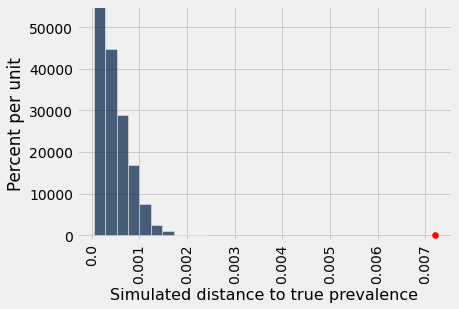

In [13]:
Table().with_column('Simulated distance to true prevalence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red')
plots.ylim(-10, 550);

As we can see that our `observed_diabetes_distance` is very far right from our distribution. This suggest that the observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent. 

The conclusion of the test is that the data favor the alternative over the null. It supports the hypothesis that the probability that a participant within the Framingham Study has diabetes is different from the prevalence of diagnosed diabetes within the population.

I infered these statement from looking at the trend observed and my hypothesis test results:

1. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
2. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.



In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting more information from each person in the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best I have. The Framingham study is generally considered the best in its class, so I'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Part 2, Section 2: Cholesterol and Heart Disease